In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
# Table 4 contains data on the amount of women getting married seperated into age bands.
data = pd.read_excel('marriagedata.xlsx', sheet_name= 'Table 4', header= 5, index_col= None, nrows= 599, usecols= 'A:U')
data.head()

,Unnamed: 0,Unnamed: 1,Total,Under 16,16,17,18,19,Under 20,20 to 24,...,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 69,70 to 79,80 and over,Age not stated4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,Total,227870.0,0,46,73,357,710,1186,19193,...,53381,26858,15304,14642,12596,8297,7077,2199,300,31
2,NaN,Single,176017.0,0,46,73,357,709,1185,19110,...,49199,20455,8652,5545,3328,1617,1010,179,20,24
3,NaN,Widowed,4048.0,0,0,0,0,0,0,4,...,63,137,196,395,571,596,1140,764,161,3
4,NaN,Divorced,47795.0,0,0,0,0,1,1,79,...,4119,6265,6453,8701,8695,6084,4927,1256,119,4


In [3]:
named_data = data.rename(columns={'Unnamed: 1': 'Type', 'Unnamed: 0': 'Year'})

yearly_marriage = named_data[named_data['Type'] == 'Total'].copy()
yearly_marriage['Year'] = yearly_marriage['Year'].astype(int)
yearly_marriage = yearly_marriage.drop(columns='Type')

# Correcting typo on excel spreadsheet 20145 -> 2014
yearly_marriage.iloc[yearly_marriage['Year'] == 20145, 0] = 2014
yearly_marriage.sort_values(by='Year', inplace= True)
yearly_marriage.reset_index(inplace= True, drop= True)

yearly_marriage


,Year,Total,Under 16,16,17,18,19,Under 20,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 69,70 to 79,80 and over,Age not stated4
0,1900,257480.0,17,140,1040,6061,13825,21083,125196,63792,21030,9918,5448,3584,1907,1084,842,59,2,3535
1,1901,259400.0,17,145,1129,6113,13658,21062,123975,65623,21846,10174,5856,3514,2031,1150,848,74,3,3244
2,1902,261750.0,14,127,1030,5797,13164,20132,124625,68298,22412,10246,5557,3357,1893,978,821,72,3,3356
3,1903,261103.0,25,121,1100,5577,12913,19736,124492,68866,22393,9855,5546,3198,1889,1018,777,78,3,3252
4,1904,257856.0,15,121,987,5622,12793,19538,123249,68143,21979,9695,5263,3111,1811,930,789,75,0,3273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2014,247372.0,0,54,146,678,1257,2135,28114,75010,55722,26863,18906,15571,11002,6638,5732,1449,205,25
115,2015,239020.0,0,59,112,455,890,1516,24153,71187,54481,26964,18076,15793,12045,6982,6000,1575,211,37
116,2016,242774.0,0,51,90,411,887,1439,22946,71230,55240,27873,17682,16352,13022,7928,6967,1844,209,42
117,2017,235910.0,0,56,84,354,749,1243,20616,69297,54205,27877,16622,15553,12841,8271,7058,2021,278,28


In [4]:
# Converting numbers from object to ints, not sure why they were stored as objects, I assume it's because of excel.
yearly_marriage = yearly_marriage[yearly_marriage.columns].apply(pd.to_numeric)
yearly_marriage.dtypes

Year                 int32
Total              float64
Under 16             int64
16                   int64
17                   int64
18                   int64
19                   int64
Under 20             int64
20 to 24             int64
25 to 29             int64
30 to 34             int64
35 to 39             int64
40 to 44             int64
45 to 49             int64
50 to 54             int64
55 to 59             int64
60 to 69             int64
70 to 79             int64
80 and over          int64
Age not stated4      int64
dtype: object

In [5]:
clean_marriage = yearly_marriage[['Year', 'Total', 'Under 20']].copy()
clean_marriage['20 to 29'] = yearly_marriage['20 to 24'] + yearly_marriage['25 to 29']
clean_marriage['30 to 39'] = yearly_marriage['30 to 34'] + yearly_marriage['35 to 39']
clean_marriage['40 to 49'] = yearly_marriage['40 to 44'] + yearly_marriage['45 to 49']
clean_marriage['50 to 59'] = yearly_marriage['50 to 54'] + yearly_marriage['55 to 59']
clean_marriage['60 to 69'] = yearly_marriage['60 to 69']
clean_marriage['70 to 79'] = yearly_marriage['70 to 79']
clean_marriage['Over 80'] = yearly_marriage['80 and over']

clean_marriage


,Year,Total,Under 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,Over 80
0,1900,257480.0,21083,188988,30948,9032,2991,842,59,2
1,1901,259400.0,21062,189598,32020,9370,3181,848,74,3
2,1902,261750.0,20132,192923,32658,8914,2871,821,72,3
3,1903,261103.0,19736,193358,32248,8744,2907,777,78,3
4,1904,257856.0,19538,191392,31674,8374,2741,789,75,0
...,...,...,...,...,...,...,...,...,...,...
114,2014,247372.0,2135,103124,82585,34477,17640,5732,1449,205
115,2015,239020.0,1516,95340,81445,33869,19027,6000,1575,211
116,2016,242774.0,1439,94176,83113,34034,20950,6967,1844,209
117,2017,235910.0,1243,89913,82082,32175,21112,7058,2021,278


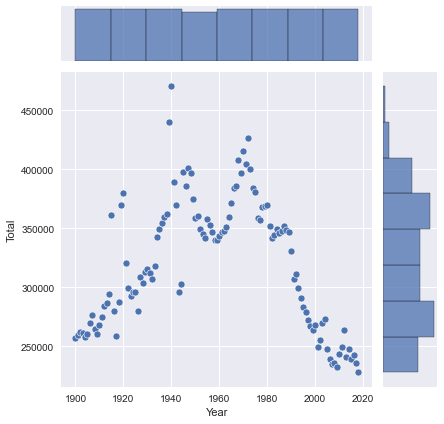

In [6]:
# Plotting distribution of total marriages over time to get a feel for the trend
sns.jointplot(data= clean_marriage, x= 'Year', y= 'Total', kind= 'scatter')

In [38]:
# I want to test time-marriage correlation, I suspect it will be negative overall, but I would also like to segment it
from scipy.stats import pearsonr

total_r, total_p = pearsonr(clean_marriage['Total'], clean_marriage['Year'])
before_1960_r, before_1960_p = pearsonr(clean_marriage['Total'][clean_marriage['Year'] < 1960], clean_marriage['Year'][clean_marriage['Year'] < 1960])
after_1960_r, after_1960_p = pearsonr(clean_marriage['Total'][clean_marriage['Year'] > 1960], clean_marriage['Year'][clean_marriage['Year'] > 1960])


corr_results = '''Total Correlation Between Marriage and Time: {}.
PearsonR P-Value: {}.
Correlation Between Marriage and Time Before 1960: {}.
PearsonR P-Value: {}.
Correlation Between Marriage and Time After 1960: {}. 
PearsonR P-Value: {}.'''

# Weak Negative Correlation with an equally weak P value when considering the entire series

print(corr_results.format(round(total_r, 5), total_p, round(before_1960_r, 5), before_1960_p, round(after_1960_r, 5), after_1960_p))

Total Correlation Between Marriage and Time: -0.13681.
PearsonR P-Value: 0.13790807445753045.
Correlation Between Marriage and Time Before 1960: 0.71688.
PearsonR P-Value: 1.1770420160983307e-10.
Correlation Between Marriage and Time After 1960: -0.92193. 
PearsonR P-Value: 9.872170267544137e-25.


Text(0, 0.5, 'Quantity of marriages. Log Scale')

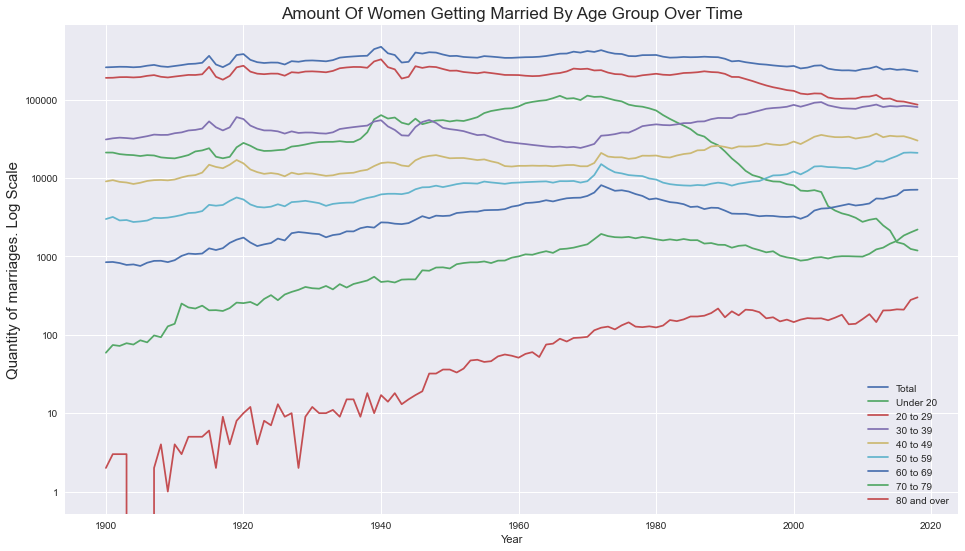

In [15]:
# Auto sets axis limits and converts exponential output to numeric equivalents 
from matplotlib.ticker import ScalarFormatter 
formatter = ScalarFormatter()
formatter.set_scientific(False)

ax = plt.figure(figsize = (16,9))
# While I would rather not use a loop here, it was all I could think of to have the age groups represented as different colors on the same plot.
for col in range(1,len(clean_marriage.columns)):
    ax = sns.lineplot(data= clean_marriage, x= 'Year', y= clean_marriage.columns[col])

ax.legend({'Total': 'Total', 'Under 20': '<20', '20 to 29': '20-29', '30 to 39': '30-39', '40 to 49': '40-49', '50 to 59': '50-59', '60 to 69': '60-69', '70 to 79': '70-79', '80 and over': '>80'})
ax.set_yscale('log')
ax.yaxis.set_major_formatter(formatter)

plt.title('Amount Of Women Getting Married By Age Group Over Time', fontdict={'fontsize': 17})
plt.ylabel('Quantity of marriages. Log Scale', fontdict={'fontsize': 15})



In [8]:
# Curious to see the exact changes in marriage rates since 1990
target_marriage = clean_marriage[clean_marriage['Year'].isin([1990, 2018])].copy()
target_marriage.sort_values('Year', inplace=True)
target_marriage = target_marriage.reset_index(drop=True)
target_marriage

,Year,Total,Under 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,Over 80
0,1990,331150.0,21786,212518,58096,24862,8490,3831,1400,167
1,2018,227870.0,1186,85999,80239,29946,20893,7077,2199,300


In [17]:
# Calculating percentage change
delta = ((target_marriage.iloc[1] / target_marriage.iloc[0])*100)-100
delta

Year          1.407035
Total       -31.188283
Under 20    -94.556137
20 to 29    -59.533310
30 to 39     38.114500
40 to 49     20.448878
50 to 59    146.089517
60 to 69     84.729836
70 to 79     57.071429
Over 80      79.640719
dtype: float64

Text(0, 0.5, 'Percentage Change')

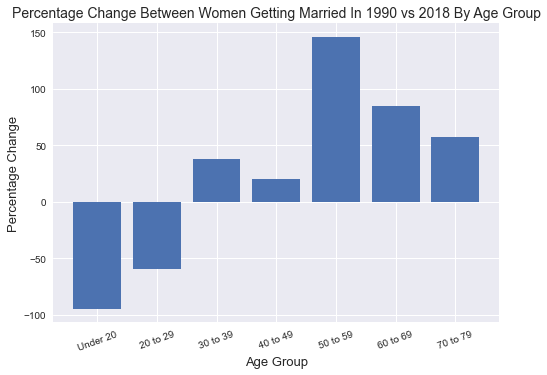

In [10]:
# Plotting the above into a bar chart
plt.bar(x= delta.index[2:-1], height= delta.values[2:-1])
plt.title('Percentage Change Between Women Getting Married In {} vs {} By Age Group'.format(target_marriage['Year'][0], target_marriage['Year'][1]), fontdict={'fontsize': 14})
plt.tick_params(axis='x', labelrotation= 20)
plt.xlabel('Age Group', fontdict={'fontsize': 13})
plt.ylabel('Percentage Change', fontdict={'fontsize': 13})